<a href="https://colab.research.google.com/github/leksandre/-crab-for-web2ipr_book_shop/blob/main/mocsTrainYOLOv3ForYoCol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
def isEmpty(path):
    if os.path.exists(path) and not os.path.isfile(path):

        # Checking if the directory is empty or not
        if not os.listdir(path):
            print("Empty directory")
        else:
            print("Not empty directory")
    else:
        print("The path is either for a file or not valid")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
if not isEmpty("/content/drive/MyDrive/mocs_dataset/instances_test/"):
  ! rm -rf /content/drive/MyDrive/mocs_dataset/instances_test/*
if not isEmpty("/content/drive/MyDrive/mocs_dataset/instances_train/"):
  ! rm -rf /content/drive/MyDrive/mocs_dataset/instances_train/*
if not isEmpty("/content/drive/MyDrive/mocs_dataset/instances_val/"):
  ! rm -rf /content/drive/MyDrive/mocs_dataset/instances_val/*

The path is either for a file or not valid
The path is either for a file or not valid


In [5]:
! cd /content/drive/MyDrive/

In [6]:
! cd /content/drive/MyDrive/mocs_dataset/

In [7]:
%ls ./

drive/  sample_data/


In [8]:
!pwd

/content


In [ ]:
!rm ./instances_*/*.txt

In [9]:
# TRAIN_IMAGE_PATH = '/content/drive/MyDrive/mocs_dataset/instances_train/'
# TEST_IMAGE_PATH = '/content/drive/MyDrive/mocs_dataset/instances_train/'
# TEST_IMAGE_PATH = '/content/drive/MyDrive/mocs_dataset/instances_val/'
TRAIN_IMAGE_PATH = '/content/instances_train/'
TEST_IMAGE_PATH = '/content/instances_train/'
VAL_IMAGE_PATH = '/content/instances_val/'

In [ ]:
if not os.path.exists("/content/instances_test/") or isEmpty("/content/instances_test/"):
  if os.path.isfile('/content/drive/MyDrive/mocs_dataset/instances_test.rar'):
    !unrar x -Y "/content/drive/MyDrive/mocs_dataset/instances_test.rar" "/content/"

In [ ]:
if not os.path.exists("/content/instances_train/") or isEmpty("/content/instances_train/"):
  if os.path.isfile('/content/drive/MyDrive/mocs_dataset/instances_train.rar'):
    !unrar x -Y "/content/drive/MyDrive/mocs_dataset/instances_train.rar" "/content/"

In [ ]:
if not os.path.exists("/content/instances_val/") or isEmpty("/content/instances_val/"):
  if os.path.isfile('/content/drive/MyDrive/mocs_dataset/instances_val.rar'):
    !unrar x -Y "/content/drive/MyDrive/mocs_dataset/instances_val.rar" "/content/"

In [12]:
#not completed
# !unrar x -Y "/content/drive/MyDrive/mocs_dataset/instances_val.rar" "/content/"

In [13]:
if not os.path.exists("/content/YoCol/") or isEmpty("/content/YoCol/"):
  !git clone https://github.com/Oskop/YoCol

Cloning into 'YoCol'...
remote: Enumerating objects: 1172, done.
remote: Total 1172 (delta 0), reused 0 (delta 0), pack-reused 1172
Receiving objects: 100% (1172/1172), 11.32 MiB | 38.01 MiB/s, done.
Resolving deltas: 100% (281/281), done.


In [14]:
#Installing compilers
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package g++-5 is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gcc-10-test-results gcc-9-test-results gcc-12-test-results gcc-11-test-results

E: Unable to locate package gcc-5
E: Package 'g++-5' has no installation candidate


In [15]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [16]:
#Changing the variables to include OpenCV and GPU in the Makefile
! cd /content/YoCol/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile if you want to use cudnn

sed: can't read Makefile: No such file or directory
sed: can't read Makefile: No such file or directory


In [17]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [18]:
!apt list --installed | grep opencv-dev



libopencv-dev/jammy,now 4.5.4+dfsg-9ubuntu4+jammy0 amd64 [installed]


In [19]:
# !OPENCV_GENERATE_PKGCONFIG=ON

In [20]:
# pkg-config --modversion opencv4

In [21]:
# pkg-config --cflags --libs opencv4

In [22]:
# pkg-config --cflags opencv
# pkg-config --libs opencv

In [23]:
# babakasd#break here

In [24]:
# %cd /content/YoCol/darknet
# !sh scripts/get_coco_dataset.sh

In [25]:
# %cd /content/YoCol/darknet/coco
# !paste <(awk "{pri!nt \"$PWD\"}" <5k.part) 5k.part | tr -d '\t' > 5k.txt
# !paste <(awk "{print \"$PWD\"}" <trainvalno5k.part) trainvalno5k.part | tr -d '\t' > trainvalno5k.txt
# %cd /content

In [26]:
import json
cars_make_model_label = open('/content/drive/MyDrive/mocs_dataset/image_info_test.json', 'r')
image_info_test = json.load(cars_make_model_label)

In [27]:
print(image_info_test['categories'])
all_label = {}
all_names = []
all_images = {}

[{'supercategory': 'Construction', 'id': 1, 'name': 'Worker'}, {'supercategory': 'Construction', 'id': 2, 'name': 'Static crane'}, {'supercategory': 'Construction', 'id': 3, 'name': 'Hanging head'}, {'supercategory': 'Construction', 'id': 4, 'name': 'Crane'}, {'supercategory': 'Construction', 'id': 5, 'name': 'Roller'}, {'supercategory': 'Construction', 'id': 6, 'name': 'Bulldozer'}, {'supercategory': 'Construction', 'id': 7, 'name': 'Excavator'}, {'supercategory': 'Construction', 'id': 8, 'name': 'Truck'}, {'supercategory': 'Construction', 'id': 9, 'name': 'Loader'}, {'supercategory': 'Construction', 'id': 10, 'name': 'Pump truck'}, {'supercategory': 'Construction', 'id': 11, 'name': 'Concrete mixer'}, {'supercategory': 'Construction', 'id': 12, 'name': 'Pile driving'}, {'supercategory': 'Construction', 'id': 13, 'name': 'Other vehicle'}]


In [28]:
#process image_info_test.json categories
# Initialize dictionary that will contain all label from both labels data
for categories in image_info_test['categories']:
  print(categories['name'])
  all_names.append(categories['name'])
  all_label[categories['name']] = []
print(all_label)

Worker
Static crane
Hanging head
Crane
Roller
Bulldozer
Excavator
Truck
Loader
Pump truck
Concrete mixer
Pile driving
Other vehicle
{'Worker': [], 'Static crane': [], 'Hanging head': [], 'Crane': [], 'Roller': [], 'Bulldozer': [], 'Excavator': [], 'Truck': [], 'Loader': [], 'Pump truck': [], 'Concrete mixer': [], 'Pile driving': [], 'Other vehicle': []}


In [29]:
for images in image_info_test['images']:
  all_images[images['file_name']] = images
print(len(all_images))

18264


In [30]:
%cd /content
import scipy.io as scio

import cv2
# matlab_train_label = scio.loadmat('devkit/cars_train_annos.mat')
# matlab_test_label = scio.loadmat('devkit/cars_test_annos_withlabels.mat')
YOLO_CLASS = 13

/content


In [31]:
# Changing test label file name from "file_names_test" list to adjust
# the key format from data.json
# for name in file_names_test:
#   for file_name in name:
#     if (int(file_name.split('.')[0])+8144) < 10000:
#       new_name = '0' + str(int(file_name.split('.')[0]) + 8144) + '.jpg'
#       name[0] = new_name
#       os.rename(TEST_IMAGE_PATH + file_name, TEST_IMAGE_PATH + new_name)
#     else:
#       new_name = str(int(file_name.split('.')[0]) + 8144) + '.jpg'
#       name[0] = new_name
#       os.rename(TEST_IMAGE_PATH + file_name, TEST_IMAGE_PATH + new_name)

In [32]:
cars_make_model_label = open('/content/drive/MyDrive/mocs_dataset/instances_train.json', 'r')
train_label = json.load(cars_make_model_label)

In [33]:
cars_make_model_label = open('/content/drive/MyDrive/mocs_dataset/instances_val.json', 'r')
val_label = json.load(cars_make_model_label)

In [34]:
cars_make_model_label = open('/content/drive/MyDrive/mocs_dataset/image_info_test.json', 'r')
test_label = json.load(cars_make_model_label)

In [35]:
import cv2
import os.path
import time

In [36]:
def procStupidMocsYoloStruk(struck):
  all_images = {}
  annotations = struck['annotations']
  images = struck['images']
  categories = struck['categories']
  for image in images:
    file_name = image['file_name']
    file_id = image['id']
    all_images[file_name] = []
    fileNameWithPath = TRAIN_IMAGE_PATH + file_name
    check_file = os.path.isfile(fileNameWithPath)

    if not check_file:
      fileNameWithPath = TEST_IMAGE_PATH + file_name
      check_file = os.path.isfile(fileNameWithPath)

    if not check_file:
      fileNameWithPath = VAL_IMAGE_PATH + file_name
      check_file = os.path.isfile(fileNameWithPath)

    if not check_file:
      print('file not exist ',file_name)
      continue

    fileLabelPath = fileNameWithPath[:-4] + '.txt'
    check_file = os.path.isfile(fileLabelPath)
    if not check_file:
      label_file = open(fileLabelPath, 'w')
      label_file.close()
    else:
      pass
      # print('annotations already exist ',file_name) #fileLabelPath
      # continue

    # time.sleep(1)
    image = cv2.imread(fileNameWithPath)
    height = image.shape[0]
    width = image.shape[1]
    filtered_list = list(filter(lambda x: x["image_id"] == file_id, annotations))
    for annotation in filtered_list:
      if 1:
      # if image.shape[1] >= 300:
          filtered_cats = list(filter(lambda x: x["id"] == annotation['category_id'], categories))
          filtered_cat = filtered_cats[0]
          obj_class = str(filtered_cat['name'])
          x1 = float(annotation['bbox'][0])
          x2 = float(annotation['bbox'][1])
          y1 = float(annotation['bbox'][2])
          y2 = float(annotation['bbox'][3])

    # if bbox[0] < 0:
    #   left = 0
    # else:
    #   left = bbox[0]
    # if bbox[1] < 0:
    #   top = 0
    # else:
    #   top = bbox[1]
    # if bbox[2] < 0:
    #   right = 1
    # else:
    #   right = bbox[2]
    # if bbox[3] < 0:
    #   bottom = 1
    # else:
    #   bottom = bbox[3]
    # надо указывать все классы

          x_center = str(((x2-x1) / 2) / width)
          y_center = str(((y2-y1) / 2) / height)
          obj_width = str((x2-x1) / width)
          obj_height = str((y2-y1) / height)
          content1 = obj_class + ' ' + x_center + ' ' + y_center + ' ' + obj_width + ' ' + obj_height
          all_images[file_name].append(content1)
          label_file = open(fileLabelPath, 'a')
          label_file.write(content1 + '\n')

  return all_images

In [37]:
allImagesStruk = [[]]

In [38]:
trainStuk = procStupidMocsYoloStruk(train_label)

In [39]:
len(train_label['images'])

19404

In [40]:
print(len(allImagesStruk))

1


In [41]:
print(len(trainStuk))

19404


In [ ]:
valStuk = procStupidMocsYoloStruk(val_label)

In [43]:
print(len(allImagesStruk))

1


In [44]:
# !find /content/ -iname 0009135.jpg

In [45]:
# Moving COCO Images into Standford Images Directory
# !mv /content/YoCol/darknet/coco/images/train2014/* /content/cars_train
# !mv /content/YoCol/darknet/coco/images/val2014/* /content/casr_test

In [46]:
# # Moving COCO Labels into Standford Images Directory
# !mv /content/YoCol/darknet/coco/labels/train2014/* /content/cars_train
# !mv /content/YoCol/darknet/coco/labels/val2014/* /content/cars_test

Darknet need to a list file of image file path that will be passes to darknet for training and validation

In [ ]:
val_images_list = os.listdir(VAL_IMAGE_PATH)
val_list_file = open('/content/val_list.txt', 'w')
for img_name3 in val_images_list:
  if img_name3.find('.jpg')>-1:
    val_list_file.write((VAL_IMAGE_PATH + img_name3).strip() + '\n')

In [47]:
# Make list file of train and test image file path
train_images_list = os.listdir(TRAIN_IMAGE_PATH)
train_list_file = open('/content/train_list.txt', 'w')
for img_name in train_images_list:
  if img_name.find('.jpg')>-1:
    train_list_file.write((TRAIN_IMAGE_PATH + img_name).strip() + '\n')

In [ ]:
test_images_list = os.listdir(TEST_IMAGE_PATH)
test_list_file = open('/content/test_list.txt', 'w')
for img_name2 in test_images_list:
  if img_name.find('.jpg')>-1:
    test_list_file.write((TEST_IMAGE_PATH + img_name2).strip() + '\n')

In [ ]:
names_file = open('/content/names.txt', 'w')
for nameClass in all_names:
  names_file.write(nameClass + '\n')

In [48]:

import cv2

In [49]:
print(os.listdir(TRAIN_IMAGE_PATH))

['0006338.jpg', '0015906.txt', '0005147.jpg', '0004919.jpg', '0000923.jpg', '0019009.jpg', '0008635.txt', '0011524.txt', '0010001.txt', '0006798.txt', '0010959.jpg', '0019147.jpg', '0003137.jpg', '0016956.txt', '0017667.txt', '0000402.txt', '0007088.jpg', '0007347.txt', '0018328.txt', '0008055.jpg', '0008711.txt', '0009999.txt', '0017844.jpg', '0011364.jpg', '0018203.txt', '0016452.jpg', '0010075.jpg', '0003477.jpg', '0014333.txt', '0004793.jpg', '0009051.txt', '0005300.txt', '0008183.txt', '0011157.jpg', '0000484.jpg', '0014461.txt', '0008924.jpg', '0012066.jpg', '0000334.jpg', '0006899.txt', '0000580.txt', '0008601.txt', '0006079.jpg', '0017118.txt', '0006233.txt', '0007006.txt', '0009740.jpg', '0016837.txt', '0011495.jpg', '0000979.jpg', '0012556.jpg', '0007264.txt', '0005816.jpg', '0013874.txt', '0015637.txt', '0018856.txt', '0016966.txt', '0003693.jpg', '0002182.txt', '0004580.txt', '0003768.jpg', '0015186.txt', '0007275.jpg', '0019037.txt', '0007265.jpg', '0005011.txt', '0002747.

In [50]:
print(TEST_IMAGE_PATH)

In [51]:
print(train_images_list)

In [52]:
!head -n 5 /content/train_list.txt

/content/instances_train/
['0006338.jpg', '0015906.txt', '0005147.jpg', '0004919.jpg', '0000923.jpg', '0019009.jpg', '0008635.txt', '0011524.txt', '0010001.txt', '0006798.txt', '0010959.jpg', '0019147.jpg', '0003137.jpg', '0016956.txt', '0017667.txt', '0000402.txt', '0007088.jpg', '0007347.txt', '0018328.txt', '0008055.jpg', '0008711.txt', '0009999.txt', '0017844.jpg', '0011364.jpg', '0018203.txt', '0016452.jpg', '0010075.jpg', '0003477.jpg', '0014333.txt', '0004793.jpg', '0009051.txt', '0005300.txt', '0008183.txt', '0011157.jpg', '0000484.jpg', '0014461.txt', '0008924.jpg', '0012066.jpg', '0000334.jpg', '0006899.txt', '0000580.txt', '0008601.txt', '0006079.jpg', '0017118.txt', '0006233.txt', '0007006.txt', '0009740.jpg', '0016837.txt', '0011495.jpg', '0000979.jpg', '0012556.jpg', '0007264.txt', '0005816.jpg', '0013874.txt', '0015637.txt', '0018856.txt', '0016966.txt', '0003693.jpg', '0002182.txt', '0004580.txt', '0003768.jpg', '0015186.txt', '0007275.jpg', '0019037.txt', '0007265.jpg'

In [53]:
!head -n 4 /content/train_list.txt

/content/instances_train/0006338.jpg
/content/instances_train/0005147.jpg
/content/instances_train/0004919.jpg
/content/instances_train/0000923.jpg


In [54]:

# why they create huge txt files?
# Then we start labelling Standford Dataset based on labels data that stored in
# "all_label" dictionary

# for name in all_label:
#   if int(name[:-4]) < 8145 :
#     label_file = open(TRAIN_IMAGE_PATH + name[:-4] + '.txt', 'w')
#   else:
#     label_file = open(TEST_IMAGE_PATH + name[:-4] + '.txt', 'w')
#   for label in all_label[name]:
#     label_file.write(label + '\n')

##Setting before Training for Yolov3

Darknet need some configuration file befor training YOLO model that had ".data" extension. This file contains some configuration such as where darknet must take list file of training and validation, classes names that will use for YOLO, and path to store .weights file

In [55]:
!mkdir /content/bk/

In [56]:
!mkdir /content/weight
# valid = /content/test_list.txt
dat = """classes = 13
train = /content/train_list.txt
valid = /content/val_list.txt
names = /content/names.txt
backup = /content/bk/"""
with open('/content/darknet.data','w') as dark:
  dark.write(dat)

In [57]:
!apt-file search opencv.pc

/bin/bash: line 1: apt-file: command not found


In [58]:
# !PKG_CONFIG_PATH=$PKG_CONFIG_PATH:/usr/lib/x86_64-linux-gnu/pkgconfig

In [59]:
# !export PKG_CONFIG_PATH

In [60]:
# !. ~/.bashrc

In [61]:
# !apt-get install apt-file
# !apt update
# !apt-file search opencv.pc

In [62]:
%cd /content/YoCol/darknet


/content/YoCol/darknet


In [63]:
!ls

cfg   examples	LICENSE       LICENSE.gen  LICENSE.meta  LICENSE.v1  python	scripts
data  include	LICENSE.fuck  LICENSE.gpl  LICENSE.mit	 Makefile    README.md	src


In [64]:
!make
#Check if darknet is installed properly
!./darknet detector help

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [65]:
%cd /content/YoCol/darknet/
# !./darknet detector train /content/darknet.data cfg/yolov3.cfg &> /dev/null

/content/YoCol/darknet


In [66]:
!cat /content/darknet.data

classes = 13
train = /content/train_list.txt
valid = /content/test_list.txt
names = /content/names.txt
backup = /content/bk/

In [67]:
!head -n 3 /content/names.txt

In [68]:
!head -n 6 /content/train_list.txt

/content/instances_train/0006338.jpg
/content/instances_train/0005147.jpg
/content/instances_train/0004919.jpg
/content/instances_train/0000923.jpg
/content/instances_train/0019009.jpg
/content/instances_train/0010959.jpg


In [69]:
!head -n  5 /content/test_list.txt

/content/instances_train/0006338.jpg
/content/instances_train/0015906.txt
/content/instances_train/0005147.jpg
/content/instances_train/0004919.jpg
/content/instances_train/0000923.jpg


In [70]:
!./darknet detector train /content/darknet.data cfg/yolov3.cfg

yolov3
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                

In [71]:
!cat /content/instances_train/0006662.txt

Hanging head 0.21168687982359427 -0.02679738562091503 0.42337375964718854 -0.05359477124183006
Worker 0.2684674751929438 0.006535947712418301 0.5369349503858876 0.013071895424836602
Static crane -0.3263506063947078 0.29411764705882354 -0.6527012127894156 0.5882352941176471


In [72]:
!ls /content/instances_train/0007915*

/content/instances_train/0007915.jpg  /content/instances_train/0007915.txt


In [ ]:
cat /content/train_list.txt |grep 0007915

In [74]:
!pip install matplotlib

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/utils/logging.py", line 13, in <module>
    from pip._vendor.rich.

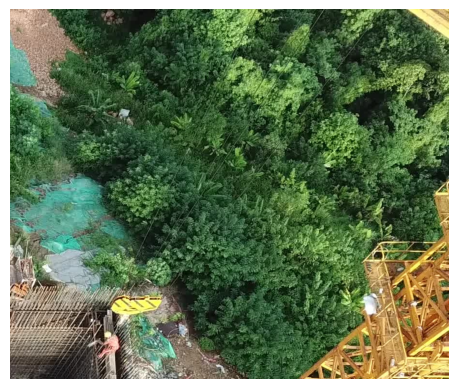

In [75]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/instances_train/0006662.jpg') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()